In [1]:
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv('../scraping/cleansed_data/players_20230425190937.csv', sep=';')

pos_dict = {'Torwart': 'Torwart',
            'Innenverteidiger': 'Abwehr',
            'Linker Verteidiger': 'Abwehr',
            'Rechter Verteidiger': 'Abwehr',
            'Defensives Mittelfeld': 'Mittelfeld',
            'Zentrales Mittelfeld': 'Mittelfeld',
            'Linkes Mittelfeld': 'Mittelfeld',
            'Offensives Mittelfeld': 'Mittelfeld',
            'Linksaußen': 'Sturm',
            'Rechtsaußen': 'Sturm',
            'Mittelstürmer': 'Sturm',
            'Rechtes Mittelfeld': 'Mittelfeld',
            'Hängende Spitze': 'Mittelfeld',
            'Mittelfeld': 'Mittelfeld',
            'Abwehr': 'Abwehr',
            'Sturm': 'Sturm'}

# Erstelle eine neue Spalte mit der Positionskategorie
df['PositionCategory'] = df['Position'].map(pos_dict)

big = df[df["NationalLeagueLevel"] == "1.Liga"]

# Erstelle eine Kopie des Dataframes
df_copy = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18335 entries, 0 to 18334
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LeagueCountry             18335 non-null  object 
 1   League                    18238 non-null  object 
 2   NationalLeagueLevel       18234 non-null  object 
 3   Club                      18331 non-null  object 
 4   No                        17905 non-null  float64
 5   Name                      18331 non-null  object 
 6   Value                     17899 non-null  float64
 7   ValueLastUpdate           17899 non-null  object 
 8   HighestValue              18004 non-null  float64
 9   HighestValueDate          18004 non-null  object 
 10  ValueCurrency             17899 non-null  object 
 11  Age                       18328 non-null  float64
 12  Height                    17052 non-null  float64
 13  Nationality               18331 non-null  object 
 14  Foot  

In [53]:
df.head()

,LeagueCountry,League,NationalLeagueLevel,Club,No,Name,Value,ValueLastUpdate,HighestValue,HighestValueDate,...,Minutes,TwGoalsConceded,TwCleanSheets,FsAssists,FsPenaltyGoals,FsMinutesPerGoal,Instagram,Source,ScrapingTime,PositionCategory
0,Schweiz,Super League,1.Liga,BSC Young Boys,26.0,David von Ballmoos,2500000.0,2022-11-10,3500000.0,2019-10-07,...,1324.0,9.0,7.0,NaN,NaN,NaN,http://www.instagram.com/davidvonballmoos/,https://www.transfermarkt.ch/david-von-ballmoo...,20230425190948,Torwart
1,Schweiz,Super League,1.Liga,BSC Young Boys,1.0,Anthony Racioppi,1300000.0,2023-03-28,2000000.0,2021-01-07,...,1286.0,12.0,5.0,NaN,NaN,NaN,http://www.instagram.com/racioppi_anthony/,https://www.transfermarkt.ch/anthony-racioppi/...,20230425191002,Torwart
2,Schweiz,Super League,1.Liga,BSC Young Boys,33.0,Marvin Keller,500000.0,2022-12-29,500000.0,2022-12-29,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://www.transfermarkt.ch/marvin-keller/pro...,20230425191015,Torwart
3,Schweiz,Super League,1.Liga,BSC Young Boys,40.0,Dario Marzino,100000.0,2023-03-28,300000.0,2021-04-21,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://www.transfermarkt.ch/dario-marzino/pro...,20230425191033,Torwart
4,Schweiz,Super League,1.Liga,BSC Young Boys,61.0,Leandro Zbinden,100000.0,2022-11-10,100000.0,2021-10-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.transfermarkt.ch/leandro-zbinden/p...,20230425191056,Torwart


In [6]:
import matplotlib.pyplot as plt

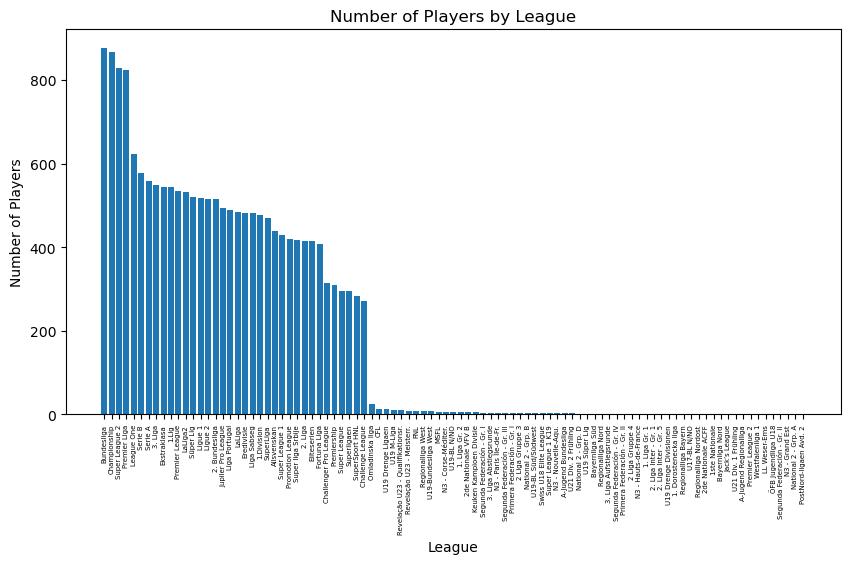

In [32]:
# Bar chart with the number of players on the y-axis and the league names on the x-axis

league_counts = df['League'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(league_counts.index, league_counts.values)
plt.xticks(rotation=90, fontsize=5)
plt.xlabel('League')
plt.ylabel('Number of Players')
plt.title('Number of Players by League')
plt.show()

# 1. National League Level filtern (1. Liga), ca. 50%
# Möchten wir statt Liga das Land anzeigen / beides? Beschriftung Idee: Bundesliga (DE)
# x / y Achse tauschen
# Fokus auf die grössten 10-15 Ligen (schauen dass CH dabei ist)

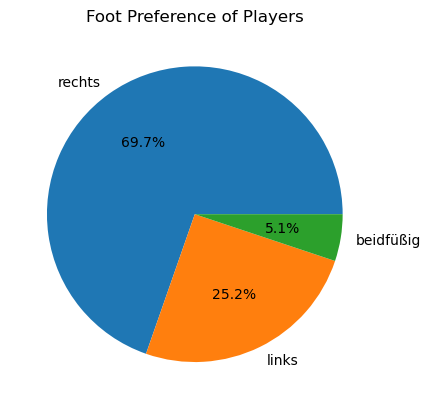

In [8]:
#This will create a pie chart with the percentage of players with left, right, or both foot preferences.

foot_counts = df['Foot'].value_counts()
plt.pie(foot_counts.values, labels=foot_counts.index, autopct='%1.1f%%')
plt.title('Foot Preference of Players')
plt.show()


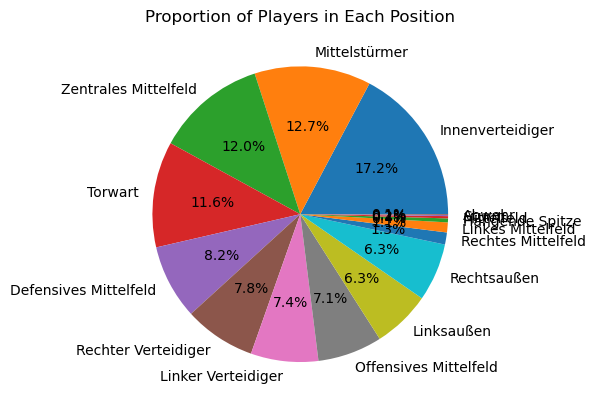

In [39]:
#Pie chart to visualize the proportion of players in each position:

# Count the number of players in each position
position_counts = df_copy['Position'].value_counts()

# Create a pie chart
plt.pie(position_counts.values, labels=position_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Players in Each Position')
plt.show()


#Siehe Mark's Bearbeitung der Positionen mit 4-5 Positionen

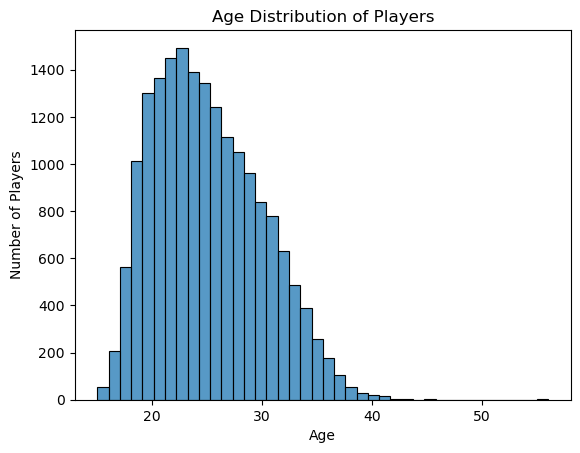

In [44]:
#This will create a histogram with the age on the x-axis and the number of players on the y-axis.

import seaborn as sns

sns.histplot(df['Age'].dropna(), bins=40)
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Age Distribution of Players')
plt.show()

#Dritte Dimension mit Ligen -> sollte Heatmap ergeben
#Zusätzlich ein Heatmap Plot erstllen mit Land/Liga, Nr. Spieler, Value

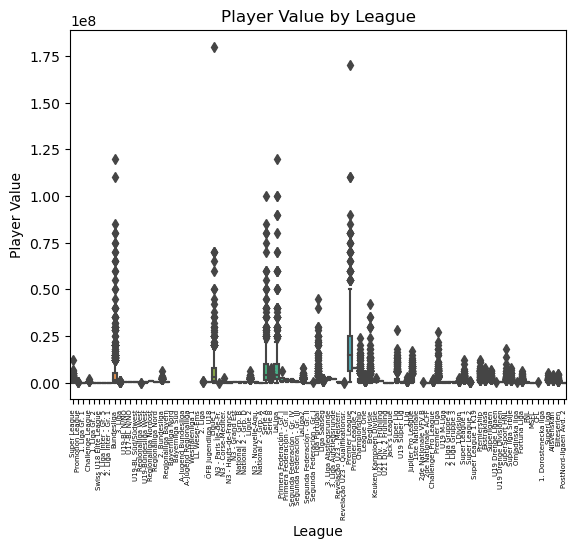

In [47]:
# Box plot with league names on the x-axis and the player values on the y-axis.

sns.boxplot(x='League', y='Value', data=df)
plt.xticks(rotation=90,fontsize=5)
plt.xlabel('League')
plt.ylabel('Player Value')
plt.title('Player Value by League')
plt.show()

#gleicher Filter wie oben, 1. Liga und Top 15
#dropna der non Value

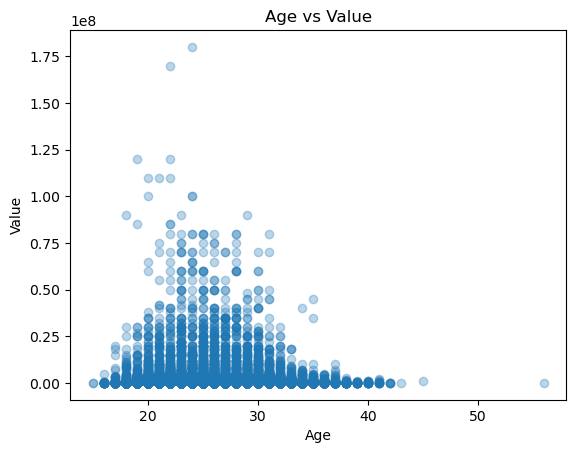

In [12]:
# Scatter plot to visualize the relationship between a player's age and their value:

plt.scatter(df_copy['Age'], df_copy['Value'], alpha=0.3)
plt.title('Age vs Value')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

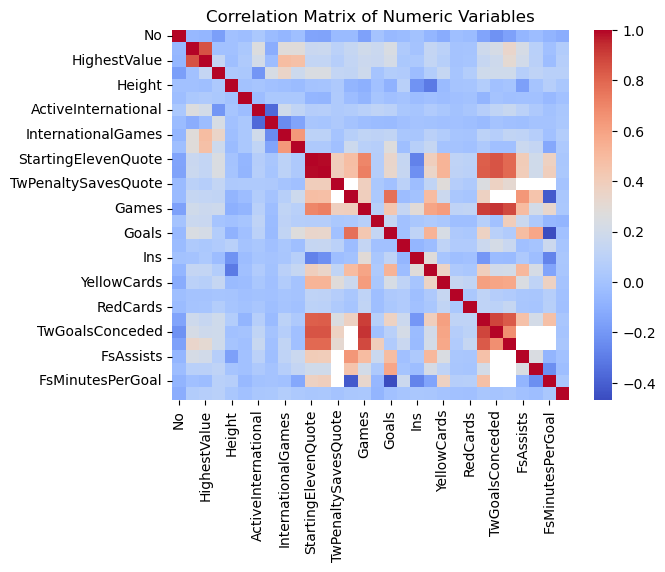

In [29]:
#Heatmap to visualize the correlation matrix between different numeric variables:

import seaborn as sns

# Select only numeric variables
numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
corr_matrix = df_copy[numeric_cols].corr()


# Create a heatmap of the correlation matrix without annotations
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)

plt.title('Correlation Matrix of Numeric Variables')
plt.show()


In [55]:
big

,LeagueCountry,League,NationalLeagueLevel,Club,No,Name,Value,ValueLastUpdate,HighestValue,HighestValueDate,...,Minutes,TwGoalsConceded,TwCleanSheets,FsAssists,FsPenaltyGoals,FsMinutesPerGoal,Instagram,Source,ScrapingTime,PositionCategory
0,Schweiz,Super League,1.Liga,BSC Young Boys,26.0,David von Ballmoos,2500000.0,2022-11-10,3500000.0,2019-10-07,...,1324.0,9.0,7.0,NaN,NaN,NaN,http://www.instagram.com/davidvonballmoos/,https://www.transfermarkt.ch/david-von-ballmoo...,20230425190948,Torwart
1,Schweiz,Super League,1.Liga,BSC Young Boys,1.0,Anthony Racioppi,1300000.0,2023-03-28,2000000.0,2021-01-07,...,1286.0,12.0,5.0,NaN,NaN,NaN,http://www.instagram.com/racioppi_anthony/,https://www.transfermarkt.ch/anthony-racioppi/...,20230425191002,Torwart
2,Schweiz,Super League,1.Liga,BSC Young Boys,33.0,Marvin Keller,500000.0,2022-12-29,500000.0,2022-12-29,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://www.transfermarkt.ch/marvin-keller/pro...,20230425191015,Torwart
3,Schweiz,Super League,1.Liga,BSC Young Boys,40.0,Dario Marzino,100000.0,2023-03-28,300000.0,2021-04-21,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,https://www.transfermarkt.ch/dario-marzino/pro...,20230425191033,Torwart
4,Schweiz,Super League,1.Liga,BSC Young Boys,61.0,Leandro Zbinden,100000.0,2022-11-10,100000.0,2021-10-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.transfermarkt.ch/leandro-zbinden/p...,20230425191056,Torwart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18330,Norwegen,Eliteserien,1.Liga,Sandefjord,7.0,Gilbert Koomson,450000.0,2022-12-09,800000.0,2021-05-21,...,88.0,NaN,NaN,0.0,0.0,NaN,NaN,https://www.transfermarkt.ch/gilbert-koomson/p...,20230426091213,Sturm
18331,Norwegen,Eliteserien,1.Liga,Sandefjord,11.0,Youssef Chaib,100000.0,2022-12-09,150000.0,2020-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.transfermarkt.ch/youssef-chaib/pro...,20230426091231,Sturm
18332,Norwegen,Eliteserien,1.Liga,Sandefjord,27.0,Jakob Dunsby,100000.0,2023-02-02,100000.0,2023-02-02,...,182.0,NaN,NaN,0.0,0.0,NaN,NaN,https://www.transfermarkt.ch/jakob-dunsby/prof...,20230426091252,Sturm
18333,Norwegen,Eliteserien,1.Liga,Sandefjord,9.0,Alexander Ruud Tveter,300000.0,2022-12-09,400000.0,2011-12-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.transfermarkt.ch/alexander-ruud-tv...,20230426091307,Sturm


<Figure size 1000x800 with 0 Axes>

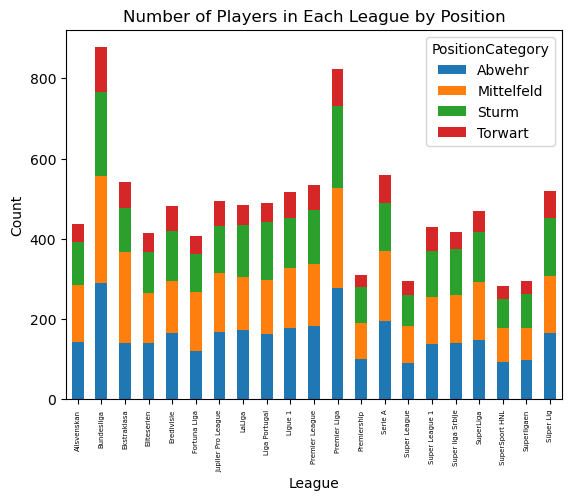

In [64]:
#Stacked bar chart to compare the number of players in each league and their position

# Create a cross-tabulation of league and position
league_position_crosstab = pd.crosstab(big['League'], big['PositionCategory'])

# Create a stacked bar chart
plt.figure(figsize=(10, 8))
league_position_crosstab.plot(kind='bar', stacked=True)
plt.title('Number of Players in Each League by Position')
plt.xlabel('League')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=5)

plt.show()

## Entfernen von Spalten und Zeilen

In [ ]:
# Entferne Source und ScrapingTime
df = df.drop(['Source', 'ScrapingTime'], axis=1)

In [ ]:
# Entferne ValueCurrency da immer Euro
df = df.drop(['ValueCurrency'], axis=1)

In [ ]:
# Lösche alle Spieler ohne Value
df = df[df['Value'].notnull()]

## Datentypen anpassen

In [ ]:
# 'ClubSince' und 'ContractUntil' als Datumsangaben einlesen
df['ClubSince'] = pd.to_datetime(df['ClubSince'])
df['ContractUntil'] = pd.to_datetime(df['ContractUntil'])

In [ ]:
# 'ClubSince' und 'ContractUntil' als float Werte umwandeln (Differenz in Tagen ab Scrapingtag 11.04.2023, da dann auch die Values ermittelt wurden)
df['ClubSince'] = ((pd.to_datetime('2023-04-11') - df['ClubSince']) / np.timedelta64(1, 'D')).astype(float)
df['ContractUntil'] = ((df['ContractUntil'] - pd.to_datetime('2023-04-11')) / np.timedelta64(1, 'D')).astype(float)

## Entferne Dublikate

In [ ]:
# Doppelte Spieler aus dem Dataframe entfernen
df = df.drop_duplicates(subset=['Name', 'Age', 'Nationality', 'Club'], keep='first')

## Fehlende Werte ersetzen (Objekte und logische Werte)

In [ ]:
# Ersetze NaN-Werte mit 'Unbekannt'
df['Nationality'].fillna('unbekannt', inplace=True)
df['Foot'].fillna('unbekannt', inplace=True)
df['Position'].fillna('unbekannt', inplace=True)
df['Supplier'].fillna('unbekannt', inplace=True)
df['Consultancy'].fillna('unbekannt', inplace=True)

In [ ]:
# Erstelle ein Dictionary mit den Positionen und ihren entsprechenden Kategorien
pos_dict = {'Torwart': 'Torwart',
            'Innenverteidiger': 'Abwehr',
            'Linker Verteidiger': 'Abwehr',
            'Rechter Verteidiger': 'Abwehr',
            'Defensives Mittelfeld': 'Mittelfeld',
            'Zentrales Mittelfeld': 'Mittelfeld',
            'Linkes Mittelfeld': 'Mittelfeld',
            'Offensives Mittelfeld': 'Mittelfeld',
            'Linksaußen': 'Sturm',
            'Rechtsaußen': 'Sturm',
            'Mittelstürmer': 'Sturm',
            'Rechtes Mittelfeld': 'Mittelfeld',
            'Hängende Spitze': 'Mittelfeld',
            'Mittelfeld': 'Mittelfeld',
            'Abwehr': 'Abwehr',
            'Sturm': 'Sturm'}

# Erstelle eine neue Spalte mit der Positionskategorie
df['PositionCategory'] = df['Position'].map(pos_dict)

In [ ]:
df['InternationalTeam'].fillna('kein_internationales_Team', inplace=True)

In [ ]:
condition = df['InternationalTeam'] == 'kein_internationales_Team'

df['InternationalGames'] = df['InternationalGames'].mask(condition & df['InternationalGames'].isna(), 0)
df['InternationalGoals'] = df['InternationalGoals'].mask(condition & df['InternationalGoals'].isna(), 0)

In [ ]:
df['Instagram'].fillna('kein_instagram', inplace=True)

In [ ]:
# Setze die Torwart-spezifischen Werte auf 0, wenn die Position des Spielers keine Torwart-Position ist und der jeweilige Wert NaN ist
df.loc[(df['Position'] != 'Torwart') & (df['TwPenaltySavesQuote'].isna()), 'TwPenaltySavesQuote'] = 0
df.loc[(df['Position'] != 'Torwart') & (df['TwGoalsConceded'].isna()), 'TwGoalsConceded'] = 0
df.loc[(df['Position'] != 'Torwart') & (df['TwCleanSheets'].isna()), 'TwCleanSheets'] = 0

In [ ]:
# Ein Wörterbuch erstellen, um den Verein und die entsprechende Liga zu speichern
club_league_dict = df[df['League'].notnull()][['Club', 'League']].set_index('Club').to_dict()['League']

# Eine Funktion definieren, um fehlende Ligawerte anhand des Vereinsnamens zu ersetzen
def impute_league(row):
    if pd.isnull(row['League']) and row['Club'] in club_league_dict:
        return club_league_dict[row['Club']]
    else:
        return row['League']

# Die Funktion anwenden, um fehlende Werte zu ersetzen
df['League'] = df.apply(impute_league, axis=1)

In [ ]:
# Gruppieren Sie das DataFrame nach Position und berechnen Sie den Modus der Spieler-Nummern für jede Position
mode_no_by_position = df.groupby('Position')['No'].agg(lambda x: x.mode()[0])

# Funktion zum Imputieren von fehlenden Spieler-Nummern (No) basierend auf der Position
def impute_no_by_position(row):
    if pd.isnull(row['No']):
        return mode_no_by_position[row['Position']]
    else:
        return row['No']

# Anwenden der Funktion auf das gesamte DataFrame, um fehlende Spieler-Nummern zu imputieren
df['No'] = df.apply(impute_no_by_position, axis=1)

In [ ]:
# Setze NaN-Werte in Karten-Werten auf 0
df['YellowCards'].fillna(0, inplace=True)
df['YellowRedCards'].fillna(0, inplace=True)
df['RedCards'].fillna(0, inplace=True)

In [ ]:
# Objekte haben keine fehlenden Werte mehr
df.info()

In [ ]:
# Fehlende Werte in Prozent pro Variable
print(df.isnull().sum() / len(df) * 100)

In [ ]:
df.to_csv('../data/df_clean.csv', index=False)

## Nicht verwendeter Code

In [ ]:
null_values = df['Minutes'].isnull().groupby([df['LeagueCountry'], df['League']]).sum().to_frame()
size_values = df.groupby(['LeagueCountry', 'League']).size()

null_values['Players'] = size_values
null_values = null_values.rename(columns={'Minutes': 'NullValues'})
null_values['NullValuesRelative'] = null_values['NullValues'] / null_values['Players'] * 100

null_values = null_values[null_values['Players'] > 20]  # exclude minor leagues
null_values = null_values.sort_values('NullValuesRelative', ascending=False)

print(null_values)